In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Read data-engineered CSV.
df = pd.read_csv('H-2B_Engineered_Data.csv')

Let's do some additional data exploration on this cleaned data to get an idea of what type of data we're working with. Not only can this help us with regard to model selection and analyzing the performance of our produced predictive model, but it also gives a better understanding of the underlying data and why our model can be effective.

To start with, let's explore some basic statistics for the entire dataset. We can begin with a simple analysis, checking modes for categorical features, and means and medians for numerical features. If so, we need to first separate (categorical and numeric) features out.

In [2]:
numeric_features = ['NBR_WORKERS_REQUESTED', 
                    'BASIC_NUMBER_OF_HOURS', 
                    'BASIC_RATE_OF_PAY', 
                    'SUPERVISE_HOW_MANY', 
                    'NUM_OF_MONTHS_TRAINING',
                    'EMP_EXP_NUM_MONTHS',
                    'WORK_DAY_LENGTH']

categorical_features = ["AGENT_POC_EMP_REP_BY_AGENT", 
                        "SOC_CODE", 
                        "NAICS_CODE", 
                        "FULL_TIME_POSITION", 
                        "NATURE_OF_TEMPORARY_NEED", 
                        "EDUCATION_LEVEL", 
                        "SWA_NAME", 
                        "CITY_MATCH", 
                        "STATE_MATCH", 
                        "DAYTIME_WORK", 
                        "HAS_OVERTIME"]

In [41]:
print("Modes of categorical features.")
display(df[categorical_features].mode())
print("\n")

print("Means of numeric features.")
display(df[numeric_features].mean())
print("\n")

print("Medians of numeric features.")
display(df[numeric_features].median())
print("\n")

Modes of categorical features.


,AGENT_POC_EMP_REP_BY_AGENT,SOC_CODE,NAICS_CODE,FULL_TIME_POSITION,NATURE_OF_TEMPORARY_NEED,EDUCATION_LEVEL,SWA_NAME,CITY_MATCH,STATE_MATCH,DAYTIME_WORK,HAS_OVERTIME
0,1,37,56,1,seasonal,none,0,different,different,1.0,1




Means of numeric features.


NBR_WORKERS_REQUESTED     18.740979
BASIC_NUMBER_OF_HOURS     38.728878
BASIC_RATE_OF_PAY         51.451810
SUPERVISE_HOW_MANY         0.160856
NUM_OF_MONTHS_TRAINING     0.100765
EMP_EXP_NUM_MONTHS         2.089908
WORK_DAY_LENGTH            9.111570
dtype: float64



Medians of numeric features.


NBR_WORKERS_REQUESTED     10.00
BASIC_NUMBER_OF_HOURS     40.00
BASIC_RATE_OF_PAY         13.91
SUPERVISE_HOW_MANY         0.00
NUM_OF_MONTHS_TRAINING     0.00
EMP_EXP_NUM_MONTHS         0.00
WORK_DAY_LENGTH            9.00
dtype: float64

Right off the bat, we can make some observations, some of which are particularly interesting to explore.

In general, it looks like many of these jobs are full-time jobs, occurring for about 9 hours during the daytime with overtime pay as needed, for a median of 40 hours a week. Given that these jobs are for temporary labor certifications (specifically, seasonal), it's not surprising that most of these jobs do not include supervising others, require training, or require any amount of prior experience. The primary SOC code associated with these applications is "Building and Grounds Cleaning and Maintenance Occupations", and the most common NAICS code is "Administrative and Support and Waste Management and Remediation Services".

Interestingly, both the modes for CITY_MATCH and STATE_MATCH are "different", meaning that the agents or attorneys hired to represent H-2B applications are located in both different states and cities. This might differ when we look at "certified-only" or "denied-only" applications, but this presents a trend that employers are relying on attorneys that are more specialized with dealing with H-2B visas as opposedd to hiring more local, general attorneys.

Finally, some interesting notes from the "mean" statistics. The BASIC_RATE_OF_PAY is exceptionally high, making me wonder if there are outliers in the dataset with regard to high paying jobs, and if these outliers are specifically associated with denials. NBR_WORKERS_REQUESTED is also higher, and it'll be interesting to see if requesting more workers is associated with better or worse outcomes.

Now, let's explore what a "generic" certified application and denied application might look like. We can begin with a simple analysis, once again checking modes, medians, and means.

We need to separate (categorical and numeric) features out.

In [5]:
df_certified = df.loc[df["CASE_STATUS"] == 1]
print("Certified applications.\n")

print("Modes of categorical features.")
display(df_certified[categorical_features].mode())
print("\n")

print("Means of numeric features.")
display(df_certified[numeric_features].mean())
print("\n")

print("Medians of numeric features.")
display(df_certified[numeric_features].median())
print("\n")

print("Maxes of numeric features.")
display(df_certified[numeric_features].max())
print("\n")

print("90th quantile of numeric features.")
display(df_certified[numeric_features].quantile(q = 0.9))
print("\n")

Certified applications.

Modes of categorical features.


,AGENT_POC_EMP_REP_BY_AGENT,SOC_CODE,NAICS_CODE,FULL_TIME_POSITION,NATURE_OF_TEMPORARY_NEED,EDUCATION_LEVEL,SWA_NAME,CITY_MATCH,STATE_MATCH,DAYTIME_WORK,HAS_OVERTIME
0,1,37,56,1,seasonal,none,0,different,different,1.0,1




Means of numeric features.


NBR_WORKERS_REQUESTED     18.339245
BASIC_NUMBER_OF_HOURS     38.661680
BASIC_RATE_OF_PAY         21.957675
SUPERVISE_HOW_MANY         0.148322
NUM_OF_MONTHS_TRAINING     0.025561
EMP_EXP_NUM_MONTHS         1.625630
WORK_DAY_LENGTH            9.119863
dtype: float64



Medians of numeric features.


NBR_WORKERS_REQUESTED     10.00
BASIC_NUMBER_OF_HOURS     40.00
BASIC_RATE_OF_PAY         13.86
SUPERVISE_HOW_MANY         0.00
NUM_OF_MONTHS_TRAINING     0.00
EMP_EXP_NUM_MONTHS         0.00
WORK_DAY_LENGTH            8.75
dtype: float64



Maxes of numeric features.


NBR_WORKERS_REQUESTED      600.000000
BASIC_NUMBER_OF_HOURS       50.000000
BASIC_RATE_OF_PAY         3500.000000
SUPERVISE_HOW_MANY          45.000000
NUM_OF_MONTHS_TRAINING      48.000000
EMP_EXP_NUM_MONTHS          60.000000
WORK_DAY_LENGTH             23.916667
dtype: float64



90th quantile of numeric features.


NBR_WORKERS_REQUESTED     40.00
BASIC_NUMBER_OF_HOURS     40.00
BASIC_RATE_OF_PAY         17.05
SUPERVISE_HOW_MANY         0.00
NUM_OF_MONTHS_TRAINING     0.00
EMP_EXP_NUM_MONTHS         3.00
WORK_DAY_LENGTH           11.00
Name: 0.9, dtype: float64

In [7]:
df_denied = df.loc[df["CASE_STATUS"] == 0]
print("Denied applications.\n")

print("Modes of categorical features.")
display(df_denied[categorical_features].mode())
print("\n")

print("Means of numeric features.")
display(df_denied[numeric_features].mean())
print("\n")

print("Medians of numeric features.")
display(df_denied[numeric_features].median())
print("\n")

print("Maxes of numeric features.")
display(df_denied[numeric_features].max())
print("\n")

print("90th quantile of numeric features.")
display(df_denied[numeric_features].quantile(q = 0.9))
print("\n")

Denied applications.

Modes of categorical features.


,AGENT_POC_EMP_REP_BY_AGENT,SOC_CODE,NAICS_CODE,FULL_TIME_POSITION,NATURE_OF_TEMPORARY_NEED,EDUCATION_LEVEL,SWA_NAME,CITY_MATCH,STATE_MATCH,DAYTIME_WORK,HAS_OVERTIME
0,1,47,23,1,peakload,none,0,different,same,1.0,1




Means of numeric features.


NBR_WORKERS_REQUESTED      21.669202
BASIC_NUMBER_OF_HOURS      39.218682
BASIC_RATE_OF_PAY         266.433777
SUPERVISE_HOW_MANY          0.252218
NUM_OF_MONTHS_TRAINING      0.648923
EMP_EXP_NUM_MONTHS          5.474018
WORK_DAY_LENGTH             9.051120
dtype: float64



Medians of numeric features.


NBR_WORKERS_REQUESTED     10.00
BASIC_NUMBER_OF_HOURS     40.00
BASIC_RATE_OF_PAY         14.68
SUPERVISE_HOW_MANY         0.00
NUM_OF_MONTHS_TRAINING     0.00
EMP_EXP_NUM_MONTHS         0.00
WORK_DAY_LENGTH            9.00
dtype: float64



Maxes of numeric features.


NBR_WORKERS_REQUESTED       350.0
BASIC_NUMBER_OF_HOURS        70.0
BASIC_RATE_OF_PAY         65000.0
SUPERVISE_HOW_MANY           30.0
NUM_OF_MONTHS_TRAINING       60.0
EMP_EXP_NUM_MONTHS          120.0
WORK_DAY_LENGTH              24.0
dtype: float64



90th quantile of numeric features.


NBR_WORKERS_REQUESTED     50.0
BASIC_NUMBER_OF_HOURS     40.0
BASIC_RATE_OF_PAY         22.4
SUPERVISE_HOW_MANY         0.0
NUM_OF_MONTHS_TRAINING     0.0
EMP_EXP_NUM_MONTHS        17.6
WORK_DAY_LENGTH           10.5
Name: 0.9, dtype: float64

Unfortunately, this doesn't immediately provide us with a perfect "generic" view of the archtypical certified or denied application, but it does provide us with some interesting insights that do follow up on my prior queries. Let's get started!

First off, for certified applications, we get some pretty similar results to that of the overall dataset. Looking at the maxes for the numeric features, it's quite surprising to see that some very outlandish values (3500 for basic rate of pay, 23.9 hours for work day length) were part of applications that were ultimately certified. Looking at the 90th quantile, however, we can see that these outlandish values are very rare, and even at the 90th quantile, more realistic values reign supreme.

Looking at denied applications now. 

Within the modes for categorical features, we can see some differences from the complete dataset and the certified applications. For one thing, the most common SOC and NAICS codes for denied applications are "Construction and Extraction Occupations" and "Construction". Given that rationale for issuing the H-2B visa requires that "there are not sufficient U.S. workers who are capable of performing the temporary services or labor", it might be that more of these applications relating to construction rejected on their failure to satisfy this condition. We can also see that the mode for nature of temporary need has shifted to peakload rather than seasonal, which might again be more difficult to justify than a seasonal need for workers. Finally, the mode for STATE_MATCH has shifted to "same", which could be explained by the idea that applications that rely more on local attorneys or agents rather than highly specialized attorneys and agents might be less likely to be certified on the basis of their hypothetically weaker legal support. These differences lend insight into important features that our prediction model can use to perform classification on these applications.

Looking at numerical features, starting with the mean values, we can immediately see a problem where the mean for basic rate of pay is more than 266 dollars, highlighting that a massive outlier exists in the data of denied applications. Moving onwards to the maxes, we can see the source of this outlier, where an application with a basic rate of pay of 65000 dollars was rejected. This might be a mistaken value entry by the applying source (meant to represent yearly salary rather than hourly), but such mistakes could be representative of a sloppy application that's less likely to be certified. In general, from looking at the 90th quantile values, rejected applications are more likely to require greater pay and experience.

Finally, let's take a closer look at the differences between the distribution of specific features in order to get a better idea of the relative distributions of certain features between certified and denied applications.

We'll start with categorical features, using their (normalized) value counts.

AGENT_POC_EMP_REP_BY_AGENT
Certified applications:


1    0.960181
0    0.039819
Name: AGENT_POC_EMP_REP_BY_AGENT, dtype: float64

Denied applications:


1    0.709759
0    0.290241
Name: AGENT_POC_EMP_REP_BY_AGENT, dtype: float64



SOC_CODE


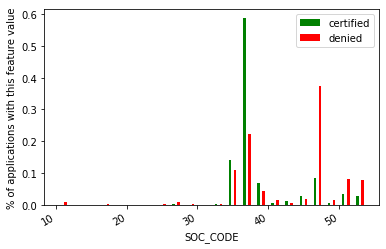



NAICS_CODE


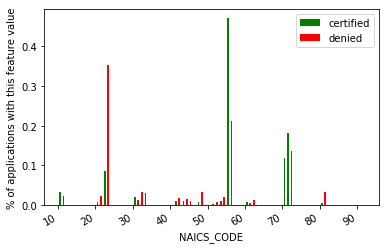



FULL_TIME_POSITION
Certified applications:


1    0.998087
0    0.001913
Name: FULL_TIME_POSITION, dtype: float64

Denied applications:


1    0.991128
0    0.008872
Name: FULL_TIME_POSITION, dtype: float64



NATURE_OF_TEMPORARY_NEED
Certified applications:


seasonal               0.560077
peakload               0.434707
one-time occurrence    0.004869
intermittent           0.000348
Name: NATURE_OF_TEMPORARY_NEED, dtype: float64

Denied applications:


peakload               0.501901
seasonal               0.365019
one-time occurrence    0.095057
intermittent           0.038023
Name: NATURE_OF_TEMPORARY_NEED, dtype: float64



EDUCATION_LEVEL
Certified applications:


none                           0.970092
high school/ged                0.022953
associate's                    0.005738
bachelor's                     0.001043
other degree (jd, md, etc.)    0.000174
Name: EDUCATION_LEVEL, dtype: float64

Denied applications:


none                           0.832700
high school/ged                0.147022
bachelor's                     0.011407
other degree (jd, md, etc.)    0.005070
associate's                    0.003802
Name: EDUCATION_LEVEL, dtype: float64



SWA_NAME
Certified applications:


0    0.994436
1    0.005564
Name: SWA_NAME, dtype: float64

Denied applications:


0    0.972117
1    0.027883
Name: SWA_NAME, dtype: float64



CITY_MATCH
Certified applications:


different    0.934098
no_rep       0.039819
same         0.026082
Name: CITY_MATCH, dtype: float64

Denied applications:


different    0.623574
no_rep       0.290241
same         0.086185
Name: CITY_MATCH, dtype: float64



STATE_MATCH
Certified applications:


different    0.653625
same         0.306555
no_rep       0.039819
Name: STATE_MATCH, dtype: float64

Denied applications:


same         0.368821
different    0.340938
no_rep       0.290241
Name: STATE_MATCH, dtype: float64



DAYTIME_WORK
Certified applications:


1.0    0.866806
0.0    0.133194
Name: DAYTIME_WORK, dtype: float64

Denied applications:


1.0    0.904943
0.0    0.095057
Name: DAYTIME_WORK, dtype: float64



HAS_OVERTIME
Certified applications:


1    0.886976
0    0.113024
Name: HAS_OVERTIME, dtype: float64

Denied applications:


1    0.700887
0    0.299113
Name: HAS_OVERTIME, dtype: float64

In [91]:
import matplotlib.pyplot as plt

for feature in categorical_features:
    certified_vc = df_certified[feature].value_counts(normalize = True)
    denied_vc = df_denied[feature].value_counts(normalize = True)
    print(feature)
    
    if feature != "SOC_CODE" and feature != "NAICS_CODE":
        print("Certified applications:")
        display(certified_vc)
        print("Denied applications:")
        display(denied_vc)
    else:
        fig, ax = plt.subplots()
        fig.autofmt_xdate()
        total_len = len(certified_vc.index) + len(denied_vc.index)
        width = total_len / 100
        ax.bar(certified_vc.index - width, certified_vc, width, label="certified", color=['green'])
        ax.bar(denied_vc.index + width, denied_vc, width, label="denied", color=['red'])
        ax.set_ylabel("% of applications with this feature value")
        ax.set_xlabel(feature)
        ax.legend()
        plt.show()
        
    print("\n")

Looking at the distributions for the features above confirms some of the trends identified earlier. The plots of the NAICS and SOC codes visualize the job types which are frequently certified or denied compared to other job types, and importantly, shows that those job truly have some sort of bias rather than those job types being a greater portion of the population. Examining the shapes of other features also shows shifts in the direction one would generally expect, such as an increase in applications without attorney representation among denied applications, or an increase in denial rates for jobs which by nature are intermittent or one-time. Among the more interesting trends shown by the shape of the data is that a higher proportion of denied applicants held a high school/ged education level than those among certified applicants. The trends observed in the features of the data provide potential predictors the model might use to classify 

Finally, let's look at numeric features, using histograms of their normalized value counts.

NBR_WORKERS_REQUESTED


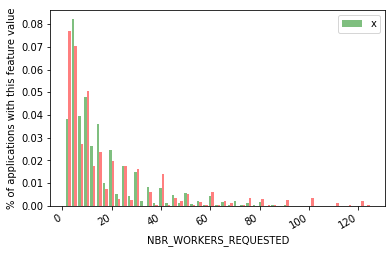



BASIC_NUMBER_OF_HOURS


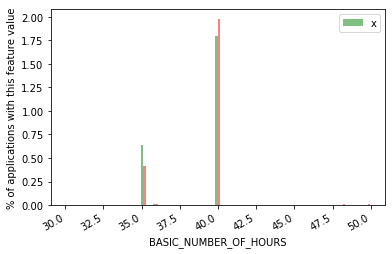



BASIC_RATE_OF_PAY


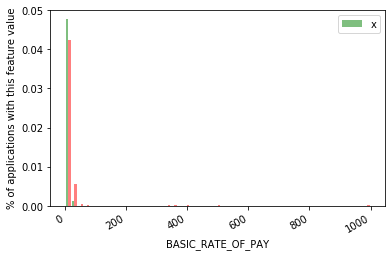



SUPERVISE_HOW_MANY


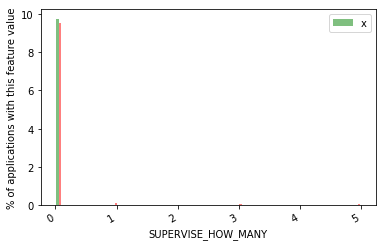



NUM_OF_MONTHS_TRAINING


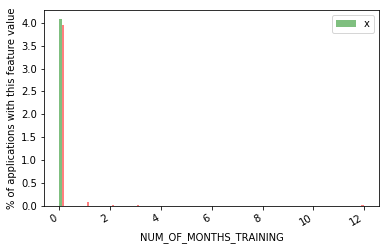



EMP_EXP_NUM_MONTHS


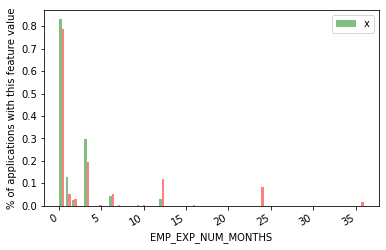



WORK_DAY_LENGTH


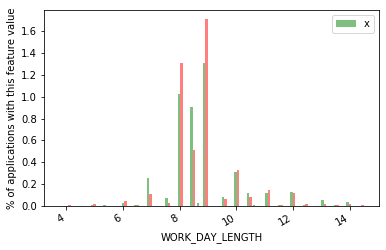

In [16]:
for feature in numeric_features:
    print(feature)
    certified_vc = df_certified[feature]
    denied_vc = df_denied[feature]
    
    # Keep points within 3 standard deviations of the mean to better visualize distribution
    certified_vc = certified_vc[np.abs(certified_vc - certified_vc.mean()) <= 3 * certified_vc.std()]
    denied_vc = denied_vc[np.abs(denied_vc - denied_vc.mean()) <= 3 * denied_vc.std()]

    fig, ax = plt.subplots()
    fig.autofmt_xdate()
    
    max_v = max(np.max(certified_vc), np.max(denied_vc))
    min_v = min(np.min(certified_vc), np.min(denied_vc))
#     print(max_v)
#     print(min_v)
    
    bins = np.linspace(min_v, max_v, 50)
    plt.hist([certified_vc, denied_vc], bins, alpha=0.5, label='x', density=True, color=["green", "red"])
    ax.set_ylabel("% of applications with this feature value")
    ax.set_xlabel(feature)
    ax.legend()
    plt.show()
    print("\n")

From looking at the graphs of the numeric features above, we can make some conclusions about the H-2B application dataset. Most companies request H-2B applications for a few number of workers, as the graph is heavily skewed right, with the vast majority of companies requesting between 0 and 50 workers. The majority of workers work between 35 and 40 hours a week, which is normal for full time workers. As for the basic rate of pay, the majority of workers are getting paid between \\$0 and \\$40 an hour, with some outliers getting paid a lot more, as the graph is skewed right. From the next two graphs, we can see that almost all of the workers will be supervising 0 workers and will have no training. For the number of months that workers are expected to have as experience, the graph is skewed right, so most workers will have a few months of experience, but there are some with a few years. The length of the work day is pretty varied, with most workers working about 8-10 hours a day, but the graph is not skew